# Ebay Don't Get Kicked Prediction 

- data cleansing & feature selection
- train/test model using training.csv
- select final model

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#enable IPython to display matplotlib graphs
%matplotlib inline
import csv

In [265]:
data=pd.read_csv('training.csv')
data.head(10)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,7,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,8,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,9,0,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,10,0,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


In [266]:
data.shape #72983

(72983, 34)

In [267]:
data.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

## Variable check up:
- response variable: 'IsBadBuy'
- index: 'Refld'
- numeric variables: 'VehicleAge','VehOdo', 'MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice','VehBCost','WarrantyCost'
- binary variables: 'Transmission','PRIMEUNIT','IsOnlineSale'
- multi-categorical variables: 'PurchDate','Auction','VehYear', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'WheelTypeID', 'Nationality', 'Size', 'TopThreeAmericanName', 'AUCGUART','BYRNO','VNZIP1', 'VNST'

In [268]:
data['BYRNO'].value_counts()

99761    3943
18880    3588
835      2987
3453     2927
22916    2852
21053    2816
19619    2738
99750    2653
17675    2617
20928    2586
21973    2548
17212    2517
20740    2414
5546     2211
18111    2115
18822    2102
23359    2076
8655     2072
20234    2063
20833    1998
19638    1853
22808    1851
18881    1751
16044    1631
25100    1622
19662    1517
20207    1351
16926    1328
52117    1248
8172     1105
         ... 
53245      81
1051       73
1151       64
1045       62
1085       50
10310      46
11410      40
1081       37
1031       31
1121       21
1141       21
1055       12
18091      11
1035       10
1125       10
10410      10
1156       10
11210       8
1041        8
16369       7
1082        7
1152        6
10510       4
10420       4
99760       2
1086        1
1157        1
10425       1
99741       1
3582        1
Name: BYRNO, dtype: int64

In [269]:
#rows with missing value check:
nan_rows = lambda df: df[df.isnull().any(axis=1)]
nan_rows(data).shape #69707 rows have NaNs

(69707, 34)

In [270]:
#columns with missing value check:
nan_cols = lambda df: df.columns[df.isnull().any()].tolist()
len(nan_cols(data)) #19 cols
nan_cols(data)

['Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART']

## Impute/Transform Missing Values

['Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART']

In [271]:
#'Trim' has too many levels and missing values
#consider convert into binary variable with 1 for having trim, and 0 for no trim
data['Trim'].value_counts()
data['Trim'].isnull().value_counts()

False    70623
True      2360
Name: Trim, dtype: int64

In [272]:
data.loc[~data['Trim'].isnull(),'Trim2']=1
data.loc[data['Trim2'].isnull(),'Trim2']=0
data['Trim2'].value_counts()

1.0    70623
0.0     2360
Name: Trim2, dtype: int64

In [273]:
#flat out to binary variables or 4D, SEDAN, SUB, MINIVAN..
data['SubModel'].value_counts().head(150) 
data['SubModel']=data['SubModel'].astype('category')
data['SubModel'].isnull().value_counts() #only 8 missing values, we will impute with top frequent level:
data.loc[data['SubModel'].isnull(),'SubModel']='4D SEDAN'
data['SubModel'].isnull().value_counts()

False    72983
Name: SubModel, dtype: int64

In [274]:
#binary variables to flat out from 'SubModel'
#'4D', '2D', SEDAN', 'SUV', 'SPORT', 'MINIVAN', 'WAGON', 'COUPE', 'PASSENGER', 'CAB', 'CONVERTIBLE','UTILITY'

keywords_from_SubModel=['4D', '2D', 'SEDAN', 'SUV', 'SPORT', 'MINIVAN', 'WAGON', 'COUPE', 'PASSENGER', 
                      'CAB', 'CONVERTIBLE','UTILITY']
binary_var_from_SubModel=['4D', '2D', 'SEDAN', 'SUV', 'SPORT', 'MINIVAN', 'WAGON', 'COUPE', 'PASSENGER', 
                      'CAB', 'CONVERTIBLE','UTILITY']

for keyword, var in zip(keywords_from_SubModel, binary_var_from_SubModel):
    data.loc[data['SubModel'].str.contains(keyword),var]=1
    data.loc[data[var].isnull(),var]=0

data[binary_var_from_SubModel].head(10)

,4D,2D,SEDAN,SUV,SPORT,MINIVAN,WAGON,COUPE,PASSENGER,CAB,CONVERTIBLE,UTILITY
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
#'Color' has only 8 missing values, we impute with top frequent level
data['Color'].isnull().value_counts()
data['Color'].value_counts() #silver is the most popular
data.loc[data['Color'].isnull(),'Color']='Silver'
data['Color'].isnull().value_counts()

False    72983
Name: Color, dtype: int64

In [276]:
#'Transmission' only 9 missing values, impute with top frequent level
data['Transmission'].isnull().value_counts()
data['Transmission'].value_counts() #'AUTO'
data.loc[data['Transmission'].isnull(),'Transmission']='AUTO'
data.loc[data['Transmission']=='Manual','Transmission']='MANUAL'
data['Transmission'].value_counts()

AUTO      70407
MANUAL     2576
Name: Transmission, dtype: int64

In [277]:
#'WheelTypeID','WheelType' are interchangeable, we will use WheelType
data['WheelType'].isnull().value_counts() #3000 missing values
data['WheelType'].value_counts() #top two frequent terms are 'Alloy', 'Covers'
#impute missing values with two frequent terms randomly
import random 
data.loc[data['WheelType'].isnull(),'WheelType']=random.choice(['Alloy','Covers'])
data['WheelType'].value_counts()

Covers     36178
Alloy      36050
Special      755
Name: WheelType, dtype: int64

In [278]:
#impute with most frequent level 'AMERICAN'
data['Nationality'].isnull().value_counts() #only 5 missing values
data['Nationality'].value_counts()
data.loc[data['Nationality'].isnull(),'Nationality']='AMERICAN'
data['Nationality'].value_counts() 

AMERICAN          61033
OTHER ASIAN        8033
TOP LINE ASIAN     3722
OTHER               195
Name: Nationality, dtype: int64

In [279]:
#impute with most frequent level
data['Size'].isnull().value_counts() #only 5 missing values
data['Size'].value_counts()
data.loc[data['Size'].isnull(),'Size']='MEDIUM'
data['Size'].value_counts() 

MEDIUM         30790
LARGE           8850
MEDIUM SUV      8090
COMPACT         7205
VAN             5854
LARGE TRUCK     3170
SMALL SUV       2276
SPECIALTY       1915
CROSSOVER       1759
LARGE SUV       1433
SMALL TRUCK      864
SPORTS           777
Name: Size, dtype: int64

In [280]:
#impute with top frequent level
data['TopThreeAmericanName'].isnull().value_counts() #only 5 missing values
data['TopThreeAmericanName'].value_counts()
data.loc[data['TopThreeAmericanName'].isnull(),'TopThreeAmericanName']='GM'
data['TopThreeAmericanName'].value_counts() 

GM          25319
CHRYSLER    23399
FORD        12315
OTHER       11950
Name: TopThreeAmericanName, dtype: int64

In [281]:
#for price related numerical variables, we impute with median value
list_to_impute=['MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice']

for var in list_to_impute:
    data.loc[data[var].isnull(), var]=data[var].median()
    
nan_rows(data[list_to_impute]) #all NaNs cleared

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice


In [282]:
#impute with top frequent level
data['PRIMEUNIT'].isnull().value_counts() #3000 missing values
data['PRIMEUNIT'].value_counts() 
data.loc[data['PRIMEUNIT'].isnull(),'PRIMEUNIT']='NO'
data['PRIMEUNIT'].value_counts()

NO     72921
YES       62
Name: PRIMEUNIT, dtype: int64

In [283]:
#Impute with cautious neutral term 'YELLOW'
data['AUCGUART'].isnull().value_counts()
data['AUCGUART'].value_counts()
data.loc[data['AUCGUART'].isnull(),'AUCGUART']='YELLOW'
data['AUCGUART'].value_counts()

YELLOW    69564
GREEN      3340
RED          79
Name: AUCGUART, dtype: int64

## Transform/Recode Features

multi-categorical variables: 'PurchDate','Auction','VehYear', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'AUCGUART','BYRNO','VNZIP1', 'VNST'

- recode 'Make' into top 4 makes and other
- use binary variables created from 'SubModel' instead 
- recode 'Color' into top 6 and other
- recode 'Size' into 'MEDIUM', 'LARGE' and 'SMALL'
- recode 'VNST' into top 5 states and other
- break 'Model' into a list of tokens, and recode into top frequency terms and other 

In [284]:
#recode 'Make' into top 4 makes and other
data['Make'].value_counts() 
top_4_make=['CHEVROLET','DODGE','FORD','CHRYSLER']

for make in top_4_make:
    data.loc[data['Make']==make, 'Make2']=make
data.loc[data['Make2'].isnull(),'Make2']='Other'
data['Make2'].value_counts()

Other        22674
CHEVROLET    17248
DODGE        12912
FORD         11305
CHRYSLER      8844
Name: Make2, dtype: int64

In [285]:
#recode 'Color' into top 6 and other
data['Color'].value_counts() 
top_6_color=['SILVER','WHITE','BLUE','GREY','BLACK','RED']

for color in top_6_color:
    data.loc[data['Color']==color, 'Color2']=color
data.loc[data['Color2'].isnull(),'Color2']='Other'
data['Color2'].value_counts()

SILVER    14875
Other     13867
WHITE     12123
BLUE      10347
GREY       7887
BLACK      7627
RED        6257
Name: Color2, dtype: int64

In [286]:
#recode 'Size' into 'MEDIUM', 'LARGE' and 'SMALL'
data['Size'].value_counts() 
sizes=['LARGE','MEDIUM','SMALL','COMPACT','VAN']

for size in sizes:
    data.loc[data['Size'].str.contains(size), 'Size2']=size
data.loc[data['Size2'].isnull(),'Size2']='Other'

#group 'COMPACT' and 'SMALL' into 'SMALL'
data.loc[data['Size2']=='COMPACT','Size2']='SMALL'
data['Size2'].value_counts()

MEDIUM    38880
LARGE     13453
SMALL     10345
VAN        5854
Other      4451
Name: Size2, dtype: int64

In [287]:
#recode 'VNST' into top 5 states and other
data['VNST'].value_counts() 
top_5_VNST=['TX','FL','CA','NC','AZ']

for state in top_5_VNST:
    data.loc[data['VNST']==state, 'VNST2']=state
data.loc[data['VNST2'].isnull(),'VNST2']='Other'
data['VNST2'].value_counts()

Other    28629
TX       13596
FL       10447
CA        7095
NC        7042
AZ        6174
Name: VNST2, dtype: int64

In [288]:
# break 'Model' into a list of tokens, and recode into top frequency terms and other
# consider the complexity and trivialness of tokens extracted, we will exclude 'Model' from analysis for now
# could consider extracting 'Engine Displacement', 'AWD/FWD/4WD', 'V6/V8' etc. 
model_to_list=' '.join(data['Model'].tolist())
tokens=model_to_list.split()
pd.DataFrame(tokens)[0].value_counts()

V6          28571
4C          11229
2WD         11009
I4           9070
FWD          7197
IMPALA       4784
GRAND        4222
2.4L         3777
CRUISER      3729
PT           3728
V8           3706
4WD          3429
MALIBU       3410
PICKUP       3280
SFI          3154
3.5L         3126
S            3082
EFI          3075
TAURUS       2756
2.0L         2633
SEBRING      2542
STRATUS      2535
3.0L         2511
2.2L         2444
MPI          2428
1500         2196
CARAVAN      2128
2.7L         2031
M            2023
6C           1909
            ...  
1.8             1
3.5             1
Unsp            1
LHS             1
FX35            1
ESCALADE        1
TOUAREG         1
SMPI            1
SOHC            1
FIT             1
/3.3L           1
MIRAGE          1
I-370           1
Engine          1
FJ              1
GX470           1
G8              1
Pacifica        1
PASSAT          1
SPYDER          1
S60             1
I-290           1
GS450H          1
RX330           1
16V       

In [289]:
#create new numeric variables of premium paid for the car toward price at average condition
#and toward price at above average condition, at time of purchase, as percentage of original paid price
#in auction market
data['premium_ave_auc']=(data['VehBCost']-data['MMRAcquisitionAuctionAveragePrice'])/data['VehBCost']
data['premium_above_auc']=(data['VehBCost']-data['MMRAcquisitionAuctionCleanPrice'])/data['VehBCost']
#in retail market
data['premium_ave_mkt']=(data['VehBCost']-data['MMRAcquisitionRetailAveragePrice'])/data['VehBCost']
data['premium_above_mkt']=(data['VehBCost']-data['MMRAcquisitonRetailCleanPrice'])/data['VehBCost']

#ideally, the dealer purchase price for a used car is higher than auction house price, but much lower than retail market price, 
#so as to realize profit by reselling the car in retail

In [290]:
data['premium_above_mkt'].describe()

count    72983.000000
mean        -0.523332
std         15.638844
min      -4224.000000
25%         -0.671207
50%         -0.473951
75%         -0.261416
max          1.000000
Name: premium_above_mkt, dtype: float64

In [291]:
#create new numeric variables of depreciation of the car at original used purchase price vs price at average condition
#and vs price at above average condition, as of current day, as percentage of original paid price
#in auction market
data['deprec_ave_auc']=(data['VehBCost']-data['MMRCurrentAuctionAveragePrice'])/data['VehBCost']
data['deprec_above_auc']=(data['VehBCost']-data['MMRCurrentAuctionCleanPrice'])/data['VehBCost']
#in retail market
data['deprec_ave_mkt']=(data['VehBCost']-data['MMRCurrentRetailAveragePrice'])/data['VehBCost']
data['deprec_above_mkt']=(data['VehBCost']-data['MMRCurrentRetailCleanPrice'])/data['VehBCost']

In [292]:
data['deprec_above_mkt'].describe()

count    72983.000000
mean        -0.571087
std         15.601168
min      -4214.000000
25%         -0.710612
50%         -0.518631
75%         -0.309794
max          1.000000
Name: deprec_above_mkt, dtype: float64

## OneHotEncode Selected Multi-Categorical and Non-indexed Binary Variables

binary variables: 'Transmission','PRIMEUNIT','IsOnlineSale' ('IsOnlineSale' is coded in 0 and 1 already)
multi-categorical variables: 'PurchDate','Auction','VehYear', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'WheelTypeID', 'Nationality', 'Size', 'TopThreeAmericanName', 'AUCGUART','BYRNO','VNZIP1', 'VNST'

Selected multi-categorical and non-indexed binary variables: 'Transmission','PRIMEUNIT', 'Auction', 'Make2', 'Color2', 'WheelType', 'Nationality', 'Size2', 'TopThreeAmericanName', 'AUCGUART', 'VNST'


In [293]:
cols_to_onehot=['Transmission','PRIMEUNIT', 'Auction', 'Make2', 'Color2', 'WheelType', 'Nationality', 'Size2', 
                'TopThreeAmericanName', 'AUCGUART', 'VNST2']
onehotencoded=pd.get_dummies(data[cols_to_onehot], prefix=cols_to_onehot)
onehotencoded.columns

Index(['Transmission_AUTO', 'Transmission_MANUAL', 'PRIMEUNIT_NO',
       'PRIMEUNIT_YES', 'Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER',
       'Make2_CHEVROLET', 'Make2_CHRYSLER', 'Make2_DODGE', 'Make2_FORD',
       'Make2_Other', 'Color2_BLACK', 'Color2_BLUE', 'Color2_GREY',
       'Color2_Other', 'Color2_RED', 'Color2_SILVER', 'Color2_WHITE',
       'WheelType_Alloy', 'WheelType_Covers', 'WheelType_Special',
       'Nationality_AMERICAN', 'Nationality_OTHER', 'Nationality_OTHER ASIAN',
       'Nationality_TOP LINE ASIAN', 'Size2_LARGE', 'Size2_MEDIUM',
       'Size2_Other', 'Size2_SMALL', 'Size2_VAN',
       'TopThreeAmericanName_CHRYSLER', 'TopThreeAmericanName_FORD',
       'TopThreeAmericanName_GM', 'TopThreeAmericanName_OTHER',
       'AUCGUART_GREEN', 'AUCGUART_RED', 'AUCGUART_YELLOW', 'VNST2_AZ',
       'VNST2_CA', 'VNST2_FL', 'VNST2_NC', 'VNST2_Other', 'VNST2_TX'],
      dtype='object')

In [294]:
#concatenate back to data:
data=pd.concat([data, onehotencoded],axis=1)
data.columns.tolist()

['RefId',
 'IsBadBuy',
 'PurchDate',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'Trim2',
 '4D',
 '2D',
 'SEDAN',
 'SUV',
 'SPORT',
 'MINIVAN',
 'WAGON',
 'COUPE',
 'PASSENGER',
 'CAB',
 'CONVERTIBLE',
 'UTILITY',
 'Make2',
 'Color2',
 'Size2',
 'VNST2',
 'premium_ave_auc',
 'premium_above_auc',
 'premium_ave_mkt',
 'premium_above_mkt',
 'deprec_ave_auc',
 'deprec_above_auc',
 'deprec_ave_mkt',
 'deprec_above_mkt',
 'Transmission_AUTO',
 'Transmission_MANUAL',
 

## Normalize Numerical Variables

numeric variables: 'VehicleAge','VehOdo', 'MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice','VehBCost','WarrantyCost'

In [295]:
cols_to_norm = ['VehicleAge','VehOdo', 'MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
                'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 
                'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
                'VehBCost','WarrantyCost',
                'premium_ave_auc','premium_above_auc','premium_ave_mkt', 'premium_above_mkt', 
                'deprec_ave_auc', 'deprec_above_auc', 'deprec_ave_mkt','deprec_above_mkt']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [296]:
data[cols_to_norm].head(10)

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,premium_ave_auc,premium_above_auc,premium_ave_mkt,premium_above_mkt,deprec_ave_auc,deprec_above_auc,deprec_ave_mkt,deprec_above_mkt
0,0.333333,0.759487,0.228291,0.266665,0.297748,0.327853,0.208583,0.232019,0.296750,0.302202,0.156132,0.092524,0.999524,0.999599,0.999472,0.999547,0.999563,0.999650,0.999472,0.999585
1,0.555556,0.800491,0.191871,0.227434,0.278838,0.303071,0.208723,0.250197,0.291044,0.311505,0.167129,0.083997,0.999626,0.999680,0.999538,0.999608,0.999592,0.999647,0.999516,0.999601
2,0.444444,0.622065,0.089637,0.129141,0.177661,0.203872,0.112956,0.150764,0.182856,0.211923,0.107746,0.131751,0.999729,0.999718,0.999544,0.999591,0.999657,0.999670,0.999529,0.999579
3,0.555556,0.548209,0.052993,0.072574,0.119191,0.137168,0.051621,0.071787,0.111950,0.134382,0.090151,0.023877,0.999808,0.999811,0.999634,0.999672,0.999813,0.999812,0.999655,0.999681
4,0.444444,0.582026,0.109540,0.137117,0.197620,0.209898,0.090896,0.118940,0.172441,0.192660,0.087952,0.079306,0.999594,0.999634,0.999378,0.999485,0.999662,0.999681,0.999455,0.999531
5,0.555556,0.687417,0.109204,0.133156,0.171597,0.206764,0.131824,0.158089,0.208521,0.230164,0.123142,0.018761,0.999711,0.999746,0.999614,0.999637,0.999650,0.999698,0.999530,0.999600
6,0.555556,0.545603,0.083030,0.109553,0.159672,0.204812,0.083422,0.111642,0.159417,0.209512,0.092351,0.010091,0.999707,0.999721,0.999521,0.999521,0.999705,0.999715,0.999521,0.999514
7,0.444444,0.549904,0.092744,0.117800,0.170599,0.185791,0.103942,0.124203,0.177636,0.200721,0.098949,0.051592,0.999695,0.999720,0.999523,0.999595,0.999656,0.999704,0.999501,0.999565
8,0.222222,0.406666,0.173451,0.197347,0.247876,0.256111,0.179637,0.199978,0.246597,0.262481,0.123142,0.002843,0.999541,0.999623,0.999443,0.999551,0.999523,0.999617,0.999444,0.999543
9,0.222222,0.721846,0.219613,0.264576,0.300256,0.329203,0.256621,0.298109,0.321904,0.361526,0.169328,0.166430,0.999577,0.999633,0.999509,0.999580,0.999504,0.999585,0.999472,0.999543


## Features Selection 

In [351]:
initial_cols_to_model=['VehicleAge','VehOdo', 
               'WarrantyCost','VehBCost','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
                'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 
                'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 
             'IsOnlineSale','Trim2',
            '4D','2D', 'SEDAN','SUV', 'SPORT', 'MINIVAN', 'WAGON','COUPE', 'PASSENGER', 'CAB','CONVERTIBLE', 'UTILITY',
                      'Transmission_AUTO','Transmission_MANUAL',
'PRIMEUNIT_YES',
'Auction_ADESA','Auction_MANHEIM',
 'Make2_CHEVROLET','Make2_CHRYSLER','Make2_DODGE', 'Make2_FORD', 
 'Color2_BLACK','Color2_BLUE','Color2_GREY','Color2_RED','Color2_SILVER','Color2_WHITE',
 'WheelType_Alloy','WheelType_Covers',
 'Nationality_AMERICAN','Nationality_OTHER ASIAN','Nationality_TOP LINE ASIAN',
 'Size2_LARGE','Size2_MEDIUM','Size2_SMALL','Size2_VAN',
 'TopThreeAmericanName_CHRYSLER','TopThreeAmericanName_FORD','TopThreeAmericanName_GM',
 'AUCGUART_GREEN','AUCGUART_RED',
 'VNST2_AZ','VNST2_CA', 'VNST2_FL','VNST2_NC','VNST2_TX']

#reserve as base variables:'PRIMEUNIT_NO','Auction_OTHER','Make2_Other','Color2_Other','WheelType_Special','Nationality_OTHER',
#'Size2_Other','TopThreeAmericanName_OTHER','AUCGUART_YELLOW','VNST2_Other',

In [352]:
#select significant features from initial set of features above and re-enter model training:

cols_to_drop=['Color2_RED',
 'Nationality_AMERICAN',
 'Size2_SMALL',
 'MMRCurrentAuctionCleanPrice',
 'TopThreeAmericanName_GM',
 'TopThreeAmericanName_CHRYSLER',
 'MMRAcquisitonRetailCleanPrice',
 'TopThreeAmericanName_FORD',
 'IsOnlineSale',
 'Make2_CHEVROLET',
 'Nationality_OTHER ASIAN',
 'Make2_FORD',
 'Color2_WHITE',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRCurrentRetailCleanPrice',
 'WarrantyCost',
 'Color2_BLACK',
 'Make2_DODGE',
 'Nationality_TOP LINE ASIAN',
 'Color2_GREY',
 'VNST2_AZ',
 'Size2_VAN',
 'Color2_SILVER',
 'Color2_BLUE',
 '2D','VNST2_CA', 'SPORT', '4D',
'MINIVAN', 'PASSENGER'] #drop insignificant variables from previous model training results

cols_to_model=pd.concat([data[list(set(initial_cols_to_model)-set(cols_to_drop))],data['IsBadBuy']], axis=1)
cols_to_model.columns.shape

(31,)

## Model Fitting - Logistic Regression

In [353]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [354]:
#train/test split for model training and accuracy testing:
selected = np.random.rand(len(cols_to_model)) < 0.70

cols_to_model_train = cols_to_model[selected] #training set

cols_to_model_test = cols_to_model[~selected] #testing set

In [355]:
#note sm.Logit() takes dataframe instead of series, need to convert label into dataframe instead of pd.Series
#all input should be in float64:
label_train=cols_to_model_train['IsBadBuy'].astype(float) #response variable
del cols_to_model_train['IsBadBuy']
for col in cols_to_model_train.columns:
    cols_to_model_train[col]=cols_to_model_train[col].astype(float)   

C:\Users\Dingding\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [356]:
#initiate logfit model 
logfit = sm.Logit(label_train, cols_to_model_train)
# fit the model
result = logfit.fit(maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.348941
         Iterations 7


In [357]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               IsBadBuy   No. Observations:                51079
Model:                          Logit   Df Residuals:                    51049
Method:                           MLE   Df Model:                           29
Date:                Tue, 26 Sep 2017   Pseudo R-squ.:                 0.07124
Time:                        20:05:04   Log-Likelihood:                -17824.
converged:                       True   LL-Null:                       -19191.
                                        LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
VNST2_TX                              0.1205      0.037      3.291      0.001       0.049       0.192
VNST2_FL                             -0.3006      0.044     -6

In [358]:
#return p-values of coefficients from fitted model:
pvalues=result.pvalues.to_frame()
pvalues.reset_index(inplace=True)
pvalues.columns=['features','pvalues']
pvalues

,features,pvalues
0,VNST2_TX,9.986326e-04
1,VNST2_FL,1.361433e-11
2,Size2_MEDIUM,7.404835e-02
3,MMRCurrentAuctionAveragePrice,1.509125e-20
4,MMRAcquisitionRetailAveragePrice,2.669854e-20
5,VNST2_NC,8.350856e-03
6,PRIMEUNIT_YES,6.462910e-02
7,VehBCost,6.309317e-13
8,Size2_LARGE,3.193190e-03
9,MMRCurrentRetailAveragePrice,5.604160e-18


In [95]:
#drop all the features with p-value <=0.2 and refit the model with updated set of features:
cols_to_drop=pvalues.loc[pvalues['pvalues']>0.2, 'features'].tolist()
cols_to_drop

[]

In [365]:
#return coefficients from fitted model with coefficient absolute value greater than 1
coefs=result.params.to_frame()
coefs[abs(coefs[0])>1]

,0
MMRCurrentAuctionAveragePrice,8.850284
MMRAcquisitionRetailAveragePrice,6.608677
PRIMEUNIT_YES,1.138138
VehBCost,-5.161594
MMRCurrentRetailAveragePrice,-6.441099
Transmission_MANUAL,-3.942836
AUCGUART_RED,-1.719425
VehOdo,1.362925
Transmission_AUTO,-3.572703
VehicleAge,2.933382


## Model Accuracy Testing 

- Accuracy score: What percent of your predictions were correct? 
- AUROC 
- Confusion Metrix
- Sensitivity/Recall: What percent of the positive cases did you catch? 
- Specificity: What percent of the negative cases did you catch?
- Precision: What percent of positive predictions were correct? 
- F1 Score
- MCC score

In [97]:
#note sm.Logit() takes dataframe instead of series, need to convert label into dataframe instead of pd.Series
#all input should be in float64:
label_test=cols_to_model_test['IsBadBuy'].astype(float) #response variable
del cols_to_model_test['IsBadBuy']
for col in cols_to_model_test.columns:
    cols_to_model_test[col]=cols_to_model_test[col].astype(float)   

C:\Users\Dingding\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [98]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy_score(label_test, result.predict(cols_to_model_test).round()) #0.878
#note arbitrary accuracy rate by predicting every buy as good buy gives accuracy rate of 87.7%. Need to at least be better than this

0.87792171868516899

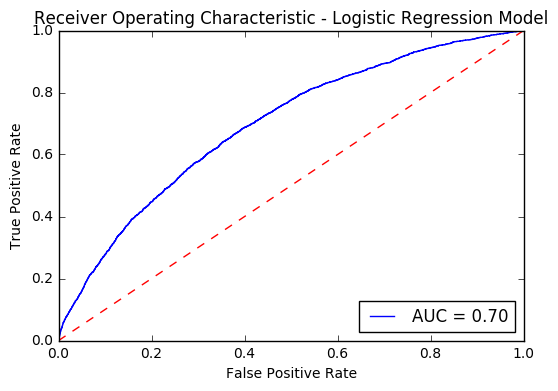

In [99]:
#ROC & AUC
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = metrics.roc_curve(label_test, result.predict(cols_to_model_test))
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic - Logistic Regression Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#according to AUROC, it seems like a cut-off probability for bad buy at 0.5 is a good start

In [114]:
#create confusion metrix and put into dataframe:
print(metrics.confusion_matrix(label_test,result.predict(cols_to_model_test).round()))

confusion_metrix=pd.DataFrame(metrics.confusion_matrix(label_test,result.predict(cols_to_model_test).round()))
confusion_metrix.columns=['predicted_0','predicted_1'] #rename columns
confusion_metrix.index=['actual_0','actual_1'] #reset index value

TP=confusion_metrix.iloc[0,0]
FP=confusion_metrix.iloc[1,0]
FN=confusion_metrix.iloc[0,1]
TN=confusion_metrix.iloc[1,1]
confusion_metrix

[[19035    11]
 [ 2637     8]]


,predicted_0,predicted_1
actual_0,19035,11
actual_1,2637,8


In [115]:
#Recall/Sensitivity
recall=TP/(TP+FN)
print("Model prediction recall is {}.".format(recall))

Model prediction recall is 0.9994224509083272.


In [123]:
#Specificity
specificity = TN/(TN+FP)
print("Model prediction specificity is {}.".format(specificity))

Model prediction specificity is 0.0030245746691871457.


In [124]:
#Precision
precision=TP/(TP+FP)
print("Model prediction precision is {}.".format(precision))

Model prediction precision is 0.8783222591362126.


In [126]:
#F1 score
f1_score=2*(precision*recall)/(precision+recall)
print("Model prediction f1 score is {}.".format(f1_score))

Model prediction f1 score is 0.9349673363131784.


## Holdout Testing Data Prediction

- read in preprocessed holdout_test.csv data

In [178]:
holdout=pd.read_csv('holdout_test.csv')
holdout.shape

(48707, 94)

In [187]:
#select features
cols_to_model_holdout=holdout[list(set(initial_cols_to_model)-set(cols_to_drop))]
cols_to_model_holdout.columns.shape #same dimension as training data excluding 'IsBadBuy'

(30,)

In [189]:
pred_holdout=result.predict(cols_to_model_holdout).round()

In [191]:
pred_holdout.value_counts()

0.0    48454
1.0      253
dtype: int64

In [196]:
submit_holdout=pd.concat([holdout['RefId'],pred_holdout], axis=1)
submit_holdout.columns=['RefId','IsBadBuy']
submit_holdout.head(10)

,RefId,IsBadBuy
0,73015,0.0
1,73016,0.0
2,73017,0.0
3,73018,0.0
4,73019,0.0
5,73020,0.0
6,73021,0.0
7,73022,0.0
8,73023,0.0
9,73024,0.0


In [197]:
#write to local csv file for submission
submit_holdout.to_csv('prediction_submit.csv', sep=',', header=True, index=False)